- Building a linear regression model
- To build a linear regression model in python, we’ll follow five steps:

### Step 1: Importing essential libraries 

In [2]:
import numpy as np                                                                    # Numerical Computations
import matplotlib.pyplot as plt                                                       # Plotting graphs
from sklearn import datasets, linear_model                                            # Dataset and Linear Regression Model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error         # Evaluating Model

### Step 2: Reading and understanding the data

In [3]:
advertising = pd.read_csv("H:/Edunet/Work Data/Microsoft  SAP  Tech Sakhsham/AI/FDP Aritificial Intelligence/Presentations/Version3/Excercises/datasets/Company_data.csv")
advertising.head()

<IPython.core.display.Javascript object>

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
# checking all features
advertising.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
# Shape of our dataset
print(advertising.shape)

(200, 4)


In [8]:
# Info our dataset
print(advertising.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [9]:
# Describe our dataset
print(advertising.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


### Step 3: Visualizing the data

Text(0, 0.5, 'Sales')

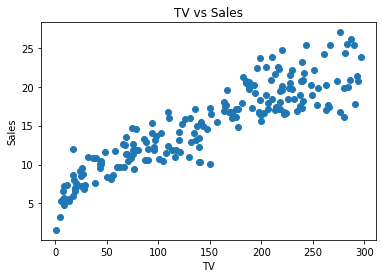

In [13]:
# Import matplotlib libraries to visualize the data
import matplotlib.pyplot as plt 
plt.scatter(advertising.TV,advertising.Sales)
plt.title("TV vs Sales")
plt.xlabel("TV")
plt.ylabel("Sales")

Text(0, 0.5, 'Radio')

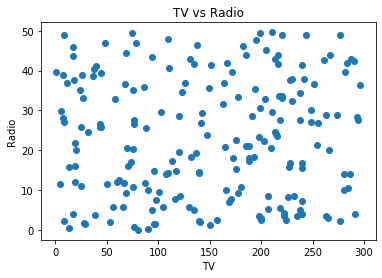

In [14]:
# Import matplotlib libraries to visualize the data
import matplotlib.pyplot as plt 
plt.scatter(advertising.TV,advertising.Radio)
plt.title("TV vs Radio")
plt.xlabel("TV")
plt.ylabel("Radio")

Text(0, 0.5, 'Newspaper')

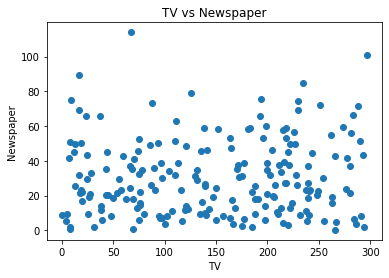

In [15]:
# Import matplotlib libraries to visualize the data
import matplotlib.pyplot as plt 
plt.scatter(advertising.TV,advertising.Newspaper)
plt.title("TV vs Newspaper")
plt.xlabel("TV")
plt.ylabel("Newspaper")

In [16]:
# As we can see from the above graphs, the TV column seems most correlated to Sales

### Step 4: Performing simple linear regression

Sales = m * TV + c

We’ll perform simple linear regression in four steps.
- Create Input(X) and Output(y)
- Create Train and Test set
- Train your model
- Evaluate the model

In [30]:
# Creating X and y
X = advertising['TV']
y = advertising['Sales']
X.head()
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [45]:
# Reshaping Data Properly
X = X.values.reshape(-1,1)

In [46]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [47]:
# Take a look at the splittted dataset
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 1)
(200,)
(140, 1)
(60, 1)
(140,)
(60,)


In [48]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
regr.coef_

array([0.05454575])

In [50]:
regr.intercept_

6.948683200001357

Sales = 0.054 * TV + 6.948

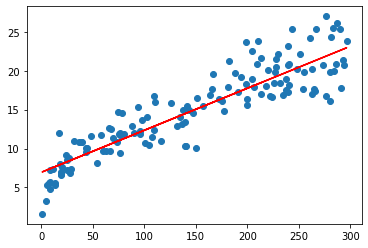

In [51]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

### Step 5: Predictions on the test set and Residual analysis

Error = Actual y value - y predicted value

In [52]:
# Predicting y_value using teting data of X
y_pred = regr.predict(X_test)

# Creating residuals from the y_train and y_pred
res = (y_test - y_pred)

### Step 6: Evaluting model

In [53]:
# Checking the R-squared value
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245662

In [54]:
# Mean square error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The mean absolute error
print('Mean Absolute Error: %2f'% mean_absolute_error(y_test, y_pred))

Mean squared error: 4.08
Mean Absolute Error: 1.648059
